In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [21]:
drinks.to_csv('drinks_bigdata', index = False)

In [44]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from matplotlib import rc
%matplotlib inline

result = drinks.groupby('continent').wine_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.264151,0,233,862
AS,9.068182,0,123,399
EU,142.222222,0,370,6400
OC,35.625000,0,212,570
SA,62.416667,1,221,749


In [49]:
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean < total_mean]
print(continent_over_mean)

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64


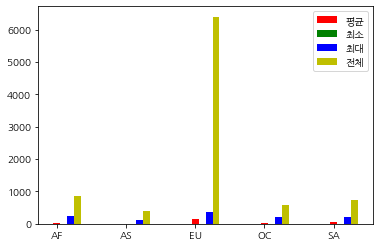

In [50]:
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rect1 = plt.bar(index, means, bar_width, color = 'r', label = '평균')
rect2 = plt.bar(index + bar_width, mins, bar_width, color = 'g', label = '최소')
rect3 = plt.bar(index + bar_width * 2, maxs, bar_width, color = 'b', label = '최대')
rect4 = plt.bar(index + bar_width * 3, sums, bar_width, color = 'y', label = '전체')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

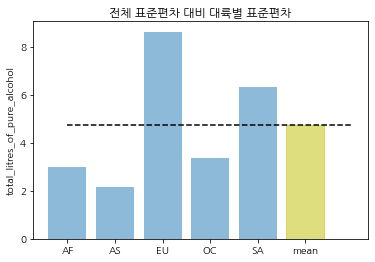

In [62]:
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('y')
plt.plot([0,6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('전체 표준편차 대비 대륙별 표준편차')

plt.show()


In [55]:
continent_mean.index

Index(['AF', 'AS', 'EU', 'OC', 'SA'], dtype='object', name='continent')

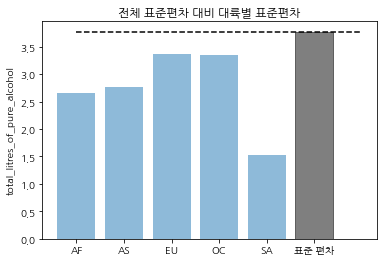

In [68]:
total_std = drinks.total_litres_of_pure_alcohol.std()
continent_std = drinks.groupby('continent')['total_litres_of_pure_alcohol'].std()

continents = continent_std.index.tolist()
continents.append('표준 편차')
x_pos = np.arange(len(continents))
alcohol = continent_std.values.tolist()
alcohol.append(total_std)

bar_list = plt.bar(x_pos, alcohol, align = 'center', alpha = 0.5)
bar_list[len(continents) - 1].set_color('black')
plt.plot([0,6], [total_std, total_std], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('전체 표준편차 대비 대륙별 표준편차')

plt.show()

In [176]:
import pandas as pd

file_path = '../data/car.csv'
car = pd.read_csv(file_path, encoding = 'cp949')

car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      8 non-null      object
 1   사고(건)   8 non-null      int64 
 2   사망(명)   8 non-null      int64 
 3   부상(명)   8 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 384.0+ bytes


In [177]:
car.head(10)

,구분,사고(건),사망(명),부상(명)
0,총계,2215,64,4032
1,고속국도,138,13,326
2,일반국도,363,14,652
3,지방도,257,13,444
4,특별광역시도,641,8,1205
5,시도,644,14,1122
6,군도,111,1,188
7,기타,61,1,95


In [178]:
car.describe()

,사고(건),사망(명),부상(명)
count,8.000000,8.00000,8.000000
mean,553.750000,16.00000,1008.000000
std,708.280967,20.15653,1287.983252
min,61.000000,1.00000,95.000000
25%,131.250000,6.25000,291.500000
50%,310.000000,13.00000,548.000000
75%,641.750000,14.00000,1142.750000
max,2215.000000,64.00000,4032.000000


In [180]:
car.groupby('구분')['사망(명)'].sum().mean()

16.0

In [186]:
car.groupby('구분').sum().sort_values(by = '사고(건)', ascending = False)

,사고(건),사망(명),부상(명)
구분,,,
총계,2215,64,4032
시도,644,14,1122
특별광역시도,641,8,1205
일반국도,363,14,652
지방도,257,13,444
고속국도,138,13,326
군도,111,1,188
기타,61,1,95


In [181]:
car['부상(명)'] = car['부상(명)'].fillna('OT')
car.head(10)

,구분,사고(건),사망(명),부상(명)
0,총계,2215,64,4032
1,고속국도,138,13,326
2,일반국도,363,14,652
3,지방도,257,13,444
4,특별광역시도,641,8,1205
5,시도,644,14,1122
6,군도,111,1,188
7,기타,61,1,95


In [196]:
car[['사고(건)', '사망(명)', '부상(명)']].std()

사고(건)     708.280967
사망(명)      20.156530
부상(명)    1287.983252
dtype: float64

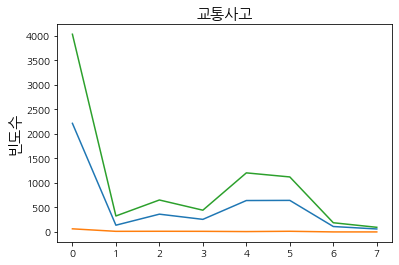

In [218]:

plt.title("교통사고", fontsize = 15)
plt.ylabel("빈도수", fontsize = 15)
plt.plot(car[['사고(건)', '사망(명)', '부상(명)']])